# Conditional Imputation
This is a tutorial on conditional imputation of missing values using ``cImpute``.

First import some third-party packages and ``xomics``:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import xomics as xo

In [2]:
# Settings
xo.plot_settings()
groups = ["A", "B", "C", "D", "E", "F"]
str_quant = "log2 LFQ "
str_ids = "Protein IDs"

# Creat imputation object
pp = xo.PreProcess(str_id=str_ids, str_quant=str_quant)
cimp = xo.cImpute(str_id=str_ids, str_quant=str_quant)

In [3]:
# Load data
# TODO update for example data
file = "data/raw_data_proteomics_lfq.xlsx"
df_raw = pd.read_excel(file)
dict_group_cols = pp.get_dict_groups(df=df_raw, groups=groups)
all_groups_col = pp.get_all_group_cols(dict_group_cols=dict_group_cols)

In [4]:
# Imputation
loc_up_mnar = 0.2
d_min, up_mnar, d_max = cimp.get_limits(df=df_raw.copy(),
                                        group_cols=all_groups_col,
                                        loc_up_mnar=loc_up_mnar)
df_imp = cimp.run(df=df_raw.copy(),
                  dict_group_cols=dict_group_cols,
                  min_cs=0.5,
                  loc_up_mnar=loc_up_mnar,
                  std_factor=0.8,
                  n_neigbhors=6)

TypeError: run() got an unexpected keyword argument 'n_neigbhors'

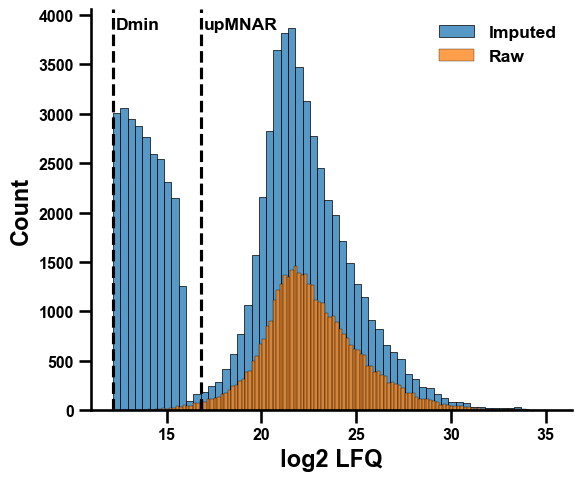

In [11]:
# Plot histogram
xo.plot_imput_histo(df_raw=df_raw,
                    df_imput=df_imp,
                    cols=all_groups_col,
                    d_min=d_min,
                    up_mnar=up_mnar)
plt.show()
plt.close()

<Figure size 600x700 with 0 Axes>

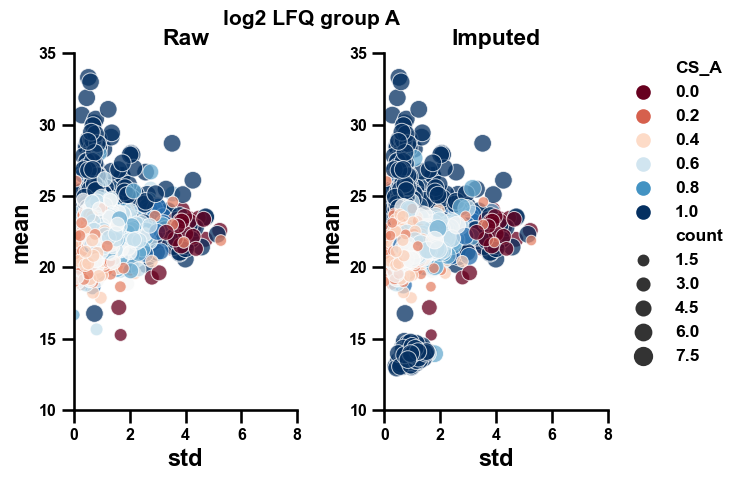

In [12]:
# Plot scatter plot for each group
df_raw_plot = df_raw.set_index(str_ids)
df_raw_plot = df_raw_plot.sort_index()
for group in dict_group_cols:
    cols = dict_group_cols[group]
    xo.plot_imput_scatter(df_raw=df_raw_plot, df_imp=df_imp, cols=cols, group=group)
    plt.show()
    plt.close()
    break